In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from typing import Callable
%matplotlib inline

## 4.1.
Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде
программ, задавая в качестве входных данных шаг сетки h . С использованием
разработанного программного обеспечения решить задачу Коши для ОДУ 2-го
порядка на указанном отрезке. Оценить погрешность численного решения с
использованием метода Рунге – Ромберга и путем сравнения с точным решением.

Задача Коши:

$y'' - \frac{1}{\sqrt x}y' + \frac{1}{4x^2}(x+\sqrt x - 8)y = 0$

$y(1) = 2e$

$y'(1) = 2e$

$x \in [1, 2], h=0.1$


Точное решение:

$y=(x^2+\frac{1}{x})e^\sqrt x$

In [2]:
def Euler(f, xa, xb, ya, y1a, h):
    n = int((xb - xa) / h)
    x = xa
    y = ya
    x_res = [x]
    y_res = [y]
    y1 = y1a
    for i in range(n):
        y1 += h * f(x, y, y1)
        y += h * y1
        x += h
        x_res.append(x)
        y_res.append(y)
    return x_res, y_res


def Runge_Kutta(f, xa, xb, ya, y1a, h):
    n = int((xb - xa) / h)
    x = xa
    y = ya
    z = y1a
    x_res = [x]
    y_res = [y]
    z_res = [z]
    for i in range(1, n + 1):
        k1 = h * z
        l1 = h * f(x, y, z)
        k2 = h * (z + 0.5 * l1)
        l2 = h * f(x + 0.5 * h, y + 0.5 * k1, z + 0.5 * l1)
        k3 = h * (z + 0.5 * l2)
        l3 = h * f(x + 0.5 * h, y + 0.5 * k2,  z + 0.5 * l2)
        k4 = h * (z + l3)
        l4 = h * f(x + h, y + k3, z + l3)
        x = xa + i * h
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        z += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)
    return (x_res, y_res), z_res


def Adams(f, x, y, h, n, z):
    z = z[:4] + [0] * (len(z) - 4)
    for i in range(3, n):
        z[i + 1] = z[i] + h/24 * (55*f(x[i], y[i], z[i]) - \
                             59*f(x[i - 1], y[i - 1], z[i - 1]) + \
                             37*f(x[i - 2], y[i - 2], z[i - 2]) - \
                             9*f(x[i - 3], y[i - 3], z[i - 3]))
        tmp = y[i] + h/24 * (55*z[i] - 59*z[i - 1] + \
                                  37*z[i - 2] - 9*z[i - 3])
        x.append(x[-1] + h)
        y.append(tmp)
    return x, y


if __name__ == '__main__':
    f = lambda x, y, y_der: 1 / np.sqrt(x) * y_der - 1/(4 * x**2) * (x + np.sqrt(x) - 8) * y
    true_f = lambda x: (x**2 + 1 / x)*np.exp(np.sqrt(x))
    a = 1
    b = 2
    y0 = 2 * math.e
    y10 = 2 * math.e
    step = 0.1

    res1 = Euler(f, a, b, y0, y10, step)
    res1_half_h = Euler(f, a, b, y0, y10, step / 2)
    res2, z = Runge_Kutta(f, a, b, y0, y10, step)
    res2_half_h, z_half_h = Runge_Kutta(f, a, b, y0, y10, step / 2)
    res3 = Adams(f, res2[0][:4], res2[1][:4], step, int((b - a) / step), z)
    res3_half_h = Adams(f, res2[0][:4], res2[1][:4], step / 2,
                        int((b - a) / step), z_half_h)

    results = {
        'Method name' : [],
        'x' : [],
        'y' : [],
        'f(x)' : [],
        '|y - f(x)|' : [],
        'Runge-Romberg error': []
    }

    for i in range(len(res1[0])):
        results['Method name'].append('Euler')
        results['x'].append(res1[0][i])
        results['y'].append(res1[1][i])
        results['f(x)'].append(true_f(res1[0][i]))
        results['|y - f(x)|'].append(abs(res1[1][i] - true_f(res1[0][i])))
        results['Runge-Romberg error'].append((res1_half_h[1][i] - res1[1][i]) / (2**1 - 1))

    for i in range(len(res2[0])):
        results['Method name'].append('Runge-Kutta')
        results['x'].append(res2[0][i])
        results['y'].append(res2[1][i])
        results['f(x)'].append(true_f(res2[0][i]))
        results['|y - f(x)|'].append(abs(res2[1][i] - true_f(res2[0][i])))
        results['Runge-Romberg error'].append((res2_half_h[1][i] - res2[1][i]) / (2**4 - 1))

    for i in range(len(res3[0])):
        results['Method name'].append('Adams')
        results['x'].append(res3[0][i])
        results['y'].append(res3[1][i])
        results['f(x)'].append(true_f(res3[0][i]))
        results['|y - f(x)|'].append(abs(res3[1][i] - true_f(res3[0][i])))
        results['Runge-Romberg error'].append((res3_half_h[1][i] - res3[1][i]) / (2**4 - 1))

In [3]:
pd.DataFrame(results)

,Method name,x,y,f(x),|y - f(x)|,Runge-Romberg error
0,Euler,1.0,5.436564,5.436564,0.000000e+00,0.000000
1,Euler,1.1,6.116134,6.048414,6.772048e-02,-0.373764
2,Euler,1.2,6.934438,6.798434,1.360044e-01,-0.852051
3,Euler,1.3,7.896120,7.690794,2.053263e-01,-1.439123
4,Euler,1.4,9.007090,8.731160,2.759293e-01,-2.140386
5,Euler,1.5,10.274184,9.926285,3.478995e-01,-2.962072
6,Euler,1.6,11.704958,11.283747,4.212114e-01,-3.911045
7,Euler,1.7,13.307542,12.811786,4.957556e-01,-4.994675
8,Euler,1.8,15.090552,14.519195,5.713571e-01,-6.220753
9,Euler,1.9,17.063031,16.415243,6.477879e-01,-7.597445


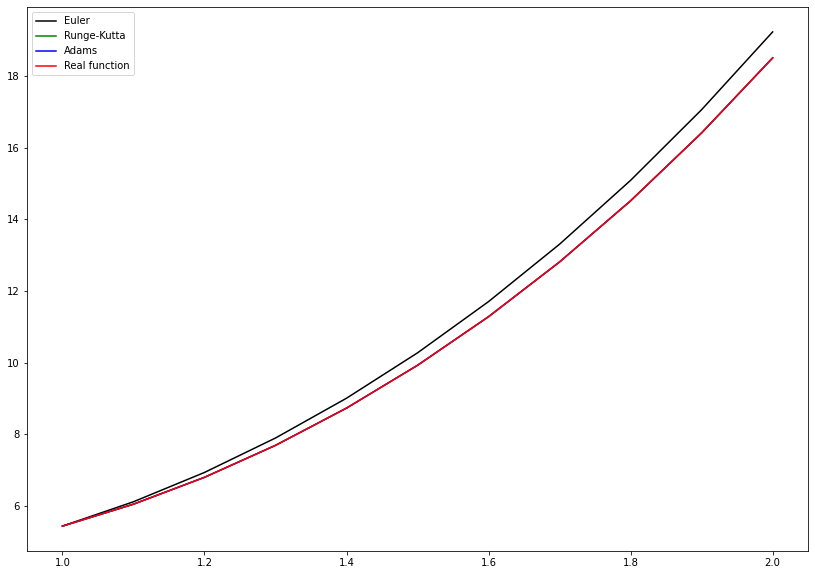

In [4]:
plt.figure(figsize=(14,10))
plt.plot(*res1, color='black', label='Euler')
plt.plot(*res2, color='green', label='Runge-Kutta')
plt.plot(*res3, color='blue', label='Adams')
plt.plot(np.arange(a, b+step, step), list(map(true_f, np.arange(a, b+step, step))), color='red', label='Real function')
plt.legend()
plt.show()

## 4.2

Реализовать метод стрельбы и конечно-разностный метод решения краевой
задачи для ОДУ в виде программ. С использованием разработанного программного
обеспечения решить краевую задачу для обыкновенного дифференциального
уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного
решения с использованием метода Рунге–Ромберга и путем сравнения с точным
решением.

Краевая задача: 

$xy'' - (2x+1)y' + (x+1)y=0$

$y'(1) = 3e$

$y'(2) - 2y(2) = 0$

Точное решение:

$y(x) = e^x x^2$


In [5]:
def tma(a, b, c, d, shape):
    p = [-c[0] / b[0]]
    q = [d[0] / b[0]]
    x = [0] * (shape + 1)
    for i in range(1, shape):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(shape)):
        x[i] = p[i] * x[i + 1] + q[i]
    return x[:-1]


def der_one(xi, yi, x):
    i = 0
    while xi[i + 1] < x - 1e-7:
        i += 1
    return (yi[i + 1] - yi[i]) / (xi[i + 1] - xi[i])


def next_n(cur_n, prev_n, ans_cur, ans_prev, alpha1, beta1, B, b):
    num1 = beta1 * der_one(ans_cur[0], ans_cur[1], b)
    num2 = beta1 * der_one(ans_prev[0], ans_prev[1], b)
    num3 = alpha1 * ans_prev[1][len(ans_prev[0]) - 1]
    num4 = alpha1 * ans_cur[1][len(ans_cur[0]) - 1] + num1 - B
    num5 = alpha1 * ans_cur[1][len(ans_cur[0]) - 1] + num1 - num3 - num2
    return cur_n - num4 * (cur_n - prev_n) / num5


def shooting_method(a, b, h, eps, f, alpha0, alpha1, beta0, beta1, A, B):
    n_prev = 1
    n_cur = 0.8
    ans_prev = Runge_Kutta(f, a, b, n_prev, (A - alpha0 * n_prev) / beta0, h)[0]
    ans_cur = Runge_Kutta(f, a, b, n_cur, (A - alpha0 * n_cur) / beta0, h)[0]
    while abs(alpha1 * ans_cur[1][len(ans_cur[0]) - 1] + \
          beta1 * der_one(ans_cur[0], ans_cur[1], b) - B) > eps:
        n = next_n(n_cur, n_prev, ans_cur, ans_prev, alpha1, beta1, B, b)
        n_prev = n_cur
        n_cur = n
        ans_prev = ans_cur
        ans_cur = Runge_Kutta(f, a, b, n_cur, (A - alpha0*n_cur) / beta0, h)[0]
    return ans_cur


def finite_difference_method(a1, b1, h, alpha_0, alpha_1, beta_0, beta_1, A, B):
    x = [a1]
    a = []
    b = []
    c = []
    d = []
    n = round((b1 - a1) / h)
    a.append(0)
    b.append(-2 / (h * (2 - p(a1) * h)) + q(a1) * h /
             (2 - p(a1) * h) + alpha_0 / beta_0)
    c.append(2 / (h * (2 - p(a1) * h)))
    d.append(A / beta_0 + h * f(a1) / (2 - p(a1) * h))
    x.append(x[0] + h)
    for i in range(1, n):
        a.append(1 / h**2 - p(x[i]) / (2 * h))
        b.append(-2 / h**2 + q(x[i]))
        c.append(1 / h**2 + p(x[i]) / (2 * h))
        d.append(f(x[i]))
        x.append(x[i] + h)
    a.append(-2 / (h * (2 + p(x[n]) *  h)))
    b.append(2 / (h * (2 + p(x[n]) * h)) - q(x[n]) * h /
             (2 + p(x[n]) * h) + alpha_1 / beta_1)
    c.append(0)
    d.append(B / beta_1 - h * f(x[n]) / (2 + p(x[n]) * h))
    y = tma(a, b, c, d, len(a))
    return x, y


if __name__ == "__main__":

    func = lambda x, y, y_der: ((2 * x + 1) * y_der - (x + 1) * y) / x
    true_f = lambda x: np.exp(x) * x**2

    # p, q, x are needed for the finite differences method and can
    # be optained from the original equation: y'' + p(x)y' + q(x)y = f(x)
    p = lambda x: -(2 * x + 1) / x
    q = lambda x: (x + 1) / x
    f = lambda x: 0

    a = 1
    b = 2
    alpha0 = 0
    alpha1 = -2
    beta0 = 1
    beta1 = 1
    y0 = 3 * math.e
    y10 = 0
    step = 0.1
    eps = 0.01

    res1 = shooting_method(a, b, step, eps, func, alpha0, alpha1, beta0, beta1, y0, y10)
    res2 = shooting_method(a, b, step / 2, eps, func, alpha0, alpha1, beta0, beta1, y0, y10)
    res1 = finite_difference_method(a, b, step, alpha0, alpha1, beta0, beta1, y0, y10)
    res2 = finite_difference_method(a, b, step / 2, alpha0, alpha1, beta0, beta1, y0, y10)

    results = {
        'Method name' : [],
        'x' : [],
        'y' : [],
        'f(x)' : [],
        '|y - f(x)|' : [],
        'Runge-Romberg error': []
    }

    for i in range(len(res1[0])):
        results['Method name'].append('Shooting method')
        results['x'].append(res1[0][i])
        results['y'].append(res1[1][i])
        results['f(x)'].append(true_f(res1[0][i]))
        results['|y - f(x)|'].append(abs(res1[1][i] - true_f(res1[0][i])))
        results['Runge-Romberg error'].append((res1_half_h[1][i] - res1[1][i]) / (2**2 - 1))

    for i in range(len(res2[0])):
        results['Method name'].append('Finite difference method')
        results['x'].append(res2[0][i])
        results['y'].append(res2[1][i])
        results['f(x)'].append(true_f(res2[0][i]))
        results['|y - f(x)|'].append(abs(res2[1][i] - true_f(res2[0][i])))
        results['Runge-Romberg error'].append((res2_half_h[1][i] - res2[1][i]) / (2**4 - 1))

In [6]:
pd.DataFrame(results)

,Method name,x,y,f(x),|y - f(x)|,Runge-Romberg error
0,Shooting method,1.00,2.841141,2.718282,0.122859,0.865141
1,Shooting method,1.10,3.750537,3.635041,0.115496,0.663944
2,Shooting method,1.20,4.885726,4.780968,0.104757,0.398887
3,Shooting method,1.30,6.291282,6.201111,0.090170,0.055239
4,Shooting method,1.40,8.019428,7.948192,0.071236,-0.384241
5,Shooting method,1.50,10.131234,10.083800,0.047434,-0.939707
6,Shooting method,1.60,12.697995,12.679763,0.018232,-1.634694
7,Shooting method,1.70,15.802809,15.819708,0.016899,-2.496647
8,Shooting method,1.80,19.542380,19.600858,0.058478,-3.557527
9,Shooting method,1.90,24.029095,24.136079,0.106984,-4.854503


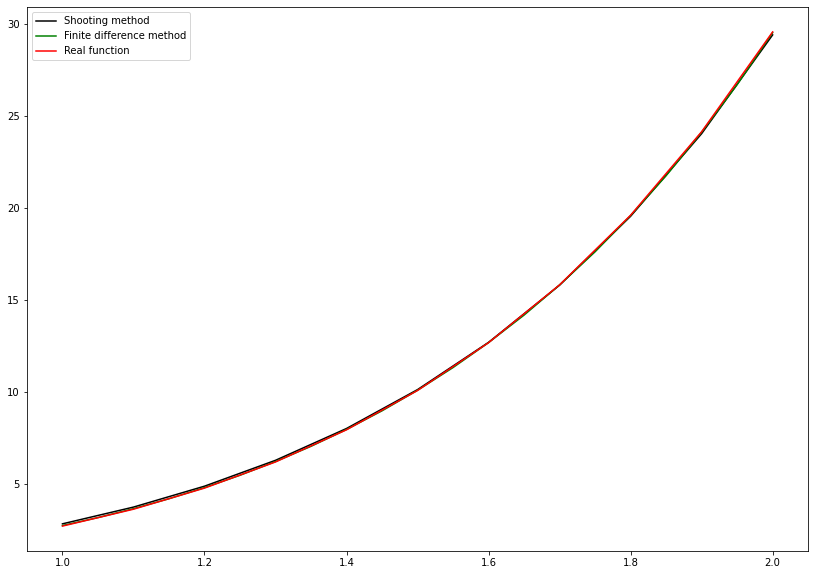

In [7]:
plt.figure(figsize=(14,10))
plt.plot(*res1, color='black', label='Shooting method')
plt.plot(*res2, color='green', label='Finite difference method')
plt.plot(np.arange(a, b+step, step), list(map(true_f, np.arange(a, b+step, step))), color='red', label='Real function')
plt.legend()
plt.show()